In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [3]:
df = pd.read_excel("dataset.xlsx")

In [4]:
data = df.copy()

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
data.head()

,POL_Time,PAYMENT_ALTERNATIVE_NAME,TARIFF_CODE,TARIFF_VERSION_NUM,VEHICLE_SUM_INSURED_AMOUNT,PLATE_CITY_CODE,PLATE_DETAIL,ARAC_YASI,FREE_PROCESS_IND,ES_REGION_NAME,AGENCY_CODE,SUB_AGENCY_CODE,DISTRICT_CODE,DISTRICT_NAME,VEH-BRAND-MODEL,MODEL_NAME,marka,PRIM,KOMISYON,SG_GB_MARS,SG_SEGMENT_NAME,SG_MUSTERI_TIPI,SG_ISKOLU_GROUP,SG_ISKOLU,SG_CINSIYETI,SG_MARITAL_STATUS,SG_OCCUPATION_NAME,SG_EDUCATIONAL_STATUS_NAME,SG_DISTRICT_CODE,SG_DISTRICT_NAME,HASARSIZLIK_KORUMA,KONUT_VE_ACS_EK_TEMINAT,OZEL_FIYATLANDIRMA,DIGER_AKSESUAR_DEGERI,HASARSIZLIK_YILI,KASA_TANK_LPG_BEDELI,ONCEKI_HASARSIZLIK_YILI,ONCEKI_SIGORTA_SIRKET,SES_GORUNTU_CIHAZLARI,YURTDISI_SURESI,YENILEME_E_H,ARAC_KULLANIM_SEKLI,VEH_AGE_RQ,ONCEKI_YENILEME_NO,INSURED_GROUP_CODE,INSURER_GROUP_CODE,INSURED_AGE_NUM,PROCESS_SCORE_CODE,COLLAR_SALARY_IND,VEHICLE_CLASS_CODE,FUEL_TYPE,RISK_COUNTY_CODE,CMM_COUNTY_CODE,RISK_INFO_02_TEXT,UW_YIL,TEKLIF_ILK_PRIM,POLICE_ADET,POLICE_PRIM,REHINLI_ALACAKLI_MI,VEH_AGE,SIGORTALI_YAS_HESAPLAMA,KASKO_PROFIL_KODU,KASKO_TECDIT_PROFIL_KODU,DK,DK_DETAY,CITY_DISTRICT_REGION1,REGION,GB_ISKOLU_ACK2,GB_ISKOLU_ACK,YT_E_H,CALLED_PERSON,SC_INDIRIMI,GRUP_INDIRIMI,TICARI_KATSAYI,YENILEME_IND,ARAC_BEDEL_GR,KASKO_PROFIL,KASKO_TECDIT_PROFIL,LUKS_ARAC_FLAG,SPOR_FLAG,LUKS_FLAG,LUKS_SPOR_FLAG,VEH_TYPE,BODY_CODE,DOORS,TRANSMISS,DRIVE,CCM,HP,FUEL_TYPE1,WEIGHT,ENGINE_TYP,CYLINDERS,LENGHT,WIDTH,HEIGHT,CYL_ARRANG,TORQUE,WHELLBASE,CLASS,nedc,seats,accelerat,top_speed,IPTAL_HARIC_NET_PRIM,YETKI_F,CUS_AGE,ONCEKI_PRIM,ONCEKI_POL_INDIRIM,ARAC_DEGISIM_F,TEKLIF_INDIIRM,ONCEKI_PRIM_INDIRIMSIZ,TEKLIF_PRIM_INDIRIMSIZ,uwym,Prim_Degisim
0,366,MANUEL TAKSITLENDIRME,80,99,64016.0,41,SC687,7,H,ISTANBUL ANADOLU 3,TGB,212,2,KARTEPE,SEAT-LEON,LEON 1.2 TSI 105 STYLE,SEAT,680.60,95.27,169688,STAR,G,BIREYSEL,BIREYSEL MIY,E,E,DIGER MESLEKLER,ÜNIVERSITE,1,IZMIT,E,NaN,NaN,0.0,9,0.0,9,1089,0.0,6.0,E,A,6,23,900000190,900000190,64,5,N#N,3,3,2.0,1.0,GBA,2019,680.60,1.0,680.60,E,6,64,5,5,TGB,TGB,MARMARA-KOCAELI,MARMARA,BIREYSEL MIY,BIREYSEL MIY,E,H,1.00,0.65,1.00,NaN,">= 64000, < 65000",YENILEME_HASARSIZ,YENILEME_HASARSIZ,H,NaN,NaN,H/H,10.0,HBA,5.0,M6,F,1197.0,105.0,O,1280.0,OTTO,4.0,4315.0,1768.0,1458.0,S,175.0,2578.0,C,5.4,5.0,10.9,185.0,680.60,H,63,619.09,1.00000,ARAC_DEGISIMI_YOK,1.0000,619.090000,680.600000,201906,0.099356
1,366,MANUEL TAKSITLENDIRME,80,99,18500.0,35,AC4235,20,H,IZMIR,TGB,92,29,URLA,FORD-FOCUS,FOCUS 2.0i GHIA SEDAN,FORD,689.65,75.83,17960,VARLIKLI,G,BIREYSEL,BIREYSEL KITLE,E,E,TANIMSIZ,ÜNIVERSITE,16,KARSIYAKA,E,NaN,NaN,0.0,9,0.0,9,1089,0.0,6.0,H,A,19,23,0,0,79,5,N#N,3,3,29.0,16.0,GBB,2019,751.18,0.0,689.65,H,19,79,5,5,TGB,TGB,EGE-IZMIR,EGE,BIREYSEL KITLE,BIREYSEL KITLE,E,H,0.95,1.00,0.90,0.36,">= 18000, < 19000",YENILEME_HASARSIZ,YENILEME_HASARSIZ,H,NaN,NaN,H/H,10.0,SED,4.0,M5,F,1999.0,145.0,O,1341.0,OTTO,4.0,4488.0,1991.0,1497.0,S,185.0,2640.0,C,7.1,5.0,9.4,210.0,0.00,E,78,716.91,0.87875,ARAC_DEGISIMI_YOK,0.8550,815.829303,806.608187,201903,0.125118
2,365,PESIN (%5 INDIRIMLI),80,98,120737.0,34,GC0392,10,H,ISTANBUL AVRUPA 5,TGB,224,16,FATIH,AUDI-A4,A4 2.0 TDI MULTITRONIC,AUDI,764.65,84.13,76449,KÜÇÜK ISLETME,T,KOBI,KOBI - KI,NaN,NaN,TANIMSIZ,TANIMSIZ,19,KUCUKCEKMECE,E,NaN,NaN,0.0,9,0.0,9,1089,0.0,6.0,H,A,8,20,0,0,999,5,N#N,4,1,16.0,19.0,TSB,2018,884.91,1.0,764.65,H,8,118,5,5,TGB,TGB,ISTANBUL-FATIH,MARMARA,KUCUK ISLETME,TUZEL KUCUK ISLETME,E,H,0.95,1.00,0.85,-0.56,">= 120000, < 125000",YENILEME_HASARSIZ,YENILEME_HASARSIZ,H,NaN,NaN,H/H,10.0,SED,4.0,T7,F,1968.0,140.0,D,1470.0,DIES,4.0,4547.0,1766.0,1428.0,S,320.0,2650.0,D,5.8,5.0,9.8,206.0,764.65,H,118,808.31,0.92500,ARAC_DEGISIMI_YOK,0.8075,873.848649,946.934985,201812,0.171500
3,366,MANUEL TAKSITLENDIRME,80,99,32337.0,35,AR3547,16,H,IZMIR,TGB,712,7,BORNOVA,HONDA-CIVIC,CIVIC 1.6 LS VTEC 4 KAPI (Y),HONDA,578.35,80.95,903460,VARLIKLI,G,BIREYSEL,BIREYSEL KITLE,E,E,BANKACI,LISE,16,KARSIYAKA,E,NaN,NaN,0.0,9,0.0,8,1089,0.0,6.0,H,A,15,20,900000190,900000190,55,5,N#N,3,3,7.0,16.0,GBB,2019,578.35,1.0,578.35,H,15,55,5,5,TGB,TGB,IZMIR-BORNOVA,

In [7]:
dropping_features = ["PLATE_DETAIL","AGENCY_CODE","SUB_AGENCY_CODE","MODEL_NAME","marka","SG_DISTRICT_CODE","SG_DISTRICT_NAME",
                     "INSURED_GROUP_CODE","INSURER_GROUP_CODE","uwym"]

In [8]:
for feat in dropping_features:
    data.drop(feat,axis = 1,inplace = True)

In [9]:
dropping_features_3 = ["DISTRICT_NAME","KOMISYON","SG_ISKOLU_GROUP","KONUT_VE_ACS_EK_TEMINAT","OZEL_FIYATLANDIRMA",
                       "INSURED_AGE_NUM","RISK_COUNTY_CODE","CMM_COUNTY_CODE","POLICE_ADET","POLICE_PRIM","SIGORTALI_YAS_HESAPLAMA",
                       "CITY_DISTRICT_REGION1","GB_ISKOLU_ACK2","GB_ISKOLU_ACK","KASKO_PROFIL","IPTAL_HARIC_NET_PRIM","Prim_Degisim",
                       "TEKLIF_INDIIRM","ONCEKI_POL_INDIRIM","ONCEKI_PRIM_INDIRIMSIZ"]

In [10]:
for feat in dropping_features_3:
    data.drop(feat,axis = 1,inplace = True)

In [11]:
data.head()

,POL_Time,PAYMENT_ALTERNATIVE_NAME,TARIFF_CODE,TARIFF_VERSION_NUM,VEHICLE_SUM_INSURED_AMOUNT,PLATE_CITY_CODE,ARAC_YASI,FREE_PROCESS_IND,ES_REGION_NAME,DISTRICT_CODE,VEH-BRAND-MODEL,PRIM,SG_GB_MARS,SG_SEGMENT_NAME,SG_MUSTERI_TIPI,SG_ISKOLU,SG_CINSIYETI,SG_MARITAL_STATUS,SG_OCCUPATION_NAME,SG_EDUCATIONAL_STATUS_NAME,HASARSIZLIK_KORUMA,DIGER_AKSESUAR_DEGERI,HASARSIZLIK_YILI,KASA_TANK_LPG_BEDELI,ONCEKI_HASARSIZLIK_YILI,ONCEKI_SIGORTA_SIRKET,SES_GORUNTU_CIHAZLARI,YURTDISI_SURESI,YENILEME_E_H,ARAC_KULLANIM_SEKLI,VEH_AGE_RQ,ONCEKI_YENILEME_NO,PROCESS_SCORE_CODE,COLLAR_SALARY_IND,VEHICLE_CLASS_CODE,FUEL_TYPE,RISK_INFO_02_TEXT,UW_YIL,TEKLIF_ILK_PRIM,REHINLI_ALACAKLI_MI,VEH_AGE,KASKO_PROFIL_KODU,KASKO_TECDIT_PROFIL_KODU,DK,DK_DETAY,REGION,YT_E_H,CALLED_PERSON,SC_INDIRIMI,GRUP_INDIRIMI,TICARI_KATSAYI,YENILEME_IND,ARAC_BEDEL_GR,KASKO_TECDIT_PROFIL,LUKS_ARAC_FLAG,SPOR_FLAG,LUKS_FLAG,LUKS_SPOR_FLAG,VEH_TYPE,BODY_CODE,DOORS,TRANSMISS,DRIVE,CCM,HP,FUEL_TYPE1,WEIGHT,ENGINE_TYP,CYLINDERS,LENGHT,WIDTH,HEIGHT,CYL_ARRANG,TORQUE,WHELLBASE,CLASS,nedc,seats,accelerat,top_speed,YETKI_F,CUS_AGE,ONCEKI_PRIM,ARAC_DEGISIM_F,TEKLIF_PRIM_INDIRIMSIZ
0,366,MANUEL TAKSITLENDIRME,80,99,64016.0,41,7,H,ISTANBUL ANADOLU 3,2,SEAT-LEON,680.60,169688,STAR,G,BIREYSEL MIY,E,E,DIGER MESLEKLER,ÜNIVERSITE,E,0.0,9,0.0,9,1089,0.0,6.0,E,A,6,23,5,N#N,3,3,GBA,2019,680.60,E,6,5,5,TGB,TGB,MARMARA,E,H,1.00,0.65,1.00,NaN,">= 64000, < 65000",YENILEME_HASARSIZ,H,NaN,NaN,H/H,10.0,HBA,5.0,M6,F,1197.0,105.0,O,1280.0,OTTO,4.0,4315.0,1768.0,1458.0,S,175.0,2578.0,C,5.4,5.0,10.9,185.0,H,63,619.09,ARAC_DEGISIMI_YOK,680.600000
1,366,MANUEL TAKSITLENDIRME,80,99,18500.0,35,20,H,IZMIR,29,FORD-FOCUS,689.65,17960,VARLIKLI,G,BIREYSEL KITLE,E,E,TANIMSIZ,ÜNIVERSITE,E,0.0,9,0.0,9,1089,0.0,6.0,H,A,19,23,5,N#N,3,3,GBB,2019,751.18,H,19,5,5,TGB,TGB,EGE,E,H,0.95,1.00,0.90,0.36,">= 18000, < 19000",YENILEME_HASARSIZ,H,NaN,NaN,H/H,10.0,SED,4.0,M5,F,1999.0,145.0,O,1341.0,OTTO,4.0,4488.0,1991.0,1497.0,S,185.0,2640.0,C,7.1,5.0,9.4,210.0,E,78,716.91,ARAC_DEGISIMI_YOK,806.608187
2,365,PESIN (%5 INDIRIMLI),80,98,120737.0,34,10,H,ISTANBUL AVRUPA 5,16,AUDI-A4,764.65,76449,KÜÇÜK ISLETME,T,KOBI - KI,NaN,NaN,TANIMSIZ,TANIMSIZ,E,0.0,9,0.0,9,1089,0.0,6.0,H,A,8,20,5,N#N,4,1,TSB,2018,884.91,H,8,5,5,TGB,TGB,MARMARA,E,H,0.95,1.00,0.85,-0.56,">= 120000, < 125000",YENILEME_HASARSIZ,H,NaN,NaN,H/H,10.0,SED,4.0,T7,F,1968.0,140.0,D,1470.0,DIES,4.0,4547.0,1766.0,1428.0,S,320.0,2650.0,D,5.8,5.0,9.8,206.0,H,118,808.31,ARAC_DEGISIMI_YOK,946.934985
3,366,MANUEL TAKSITLENDIRME,80,99,32337.0,35,16,H,IZMIR,7,HONDA-CIVIC,578.35,903460,VARLIKLI,G,BIREYSEL KITLE,E,E,BANKACI,LISE,E,0.0,9,0.0,8,1089,0.0,6.0,H,A,15,20,5,N#N,3,3,GBB,2019,578.35,H,15,5,5,TGB,TGB,EGE,E,H,1.00,0.65,1.00,NaN,">= 32000, < 33000",YENILEME_HASARSIZ,H,NaN,NaN,H/H,10.0,SED,4.0,M5,F,1590.0,110.0,O,1102.0,OTTO,4.0,4458.0,1715.0,1440.0,S,152.0,2620.0,C,6.5,5.0,9.2,195.0,H,54,561.41,ARAC_DEGISIMI_YOK,578.350000
4,366,9 TAKSIT,80,99,46228.0,34,10,H,ISTANBUL AVRUPA 4,5,OPEL-ASTRA,776.04,1218400,SÜPERSTAR,G,BIREYSEL MIY,E,E,DIGER MESLEKLER,ILKOKUL,E,0.0,9,0.0,9,1089,0.0,6.0,H,A,9,21,5,N#Y,3,3,GBA,2019,776.04,H,9,5,5,TGB,TGB,MARMARA,E,H,1.00,1.00,1.15,-0.42,">= 46000, < 47000",YENILEME_HASARSIZ,H,NaN,NaN,H/H,10.0,HBA,5.0,M5,F,1364.0,90.0,O,1205.0,OTTO,4.0,4111.0,1709.0,1425.0,S,125.0,2614.0,C,6.3,5.0,14.0,182.0,H,78,518.86,ARAC_DEGISIMI_YOK,674.817391


In [12]:
data.LUKS_SPOR_FLAG.value_counts()

H/H    97875
E/H     1268
E/E      269
Name: LUKS_SPOR_FLAG, dtype: int64

In [13]:
dropping_features_2 = ["LUKS_ARAC_FLAG","LUKS_FLAG","SPOR_FLAG"]

In [14]:
for feat in dropping_features_2:
    data.drop(feat,axis = 1,inplace = True)

In [15]:
print("Skewness: %f" % data["TEKLIF_PRIM_INDIRIMSIZ"].skew())
print("Kurtosis: %f" % data["TEKLIF_PRIM_INDIRIMSIZ"].kurt())

Skewness: 8.640313
Kurtosis: 241.403261


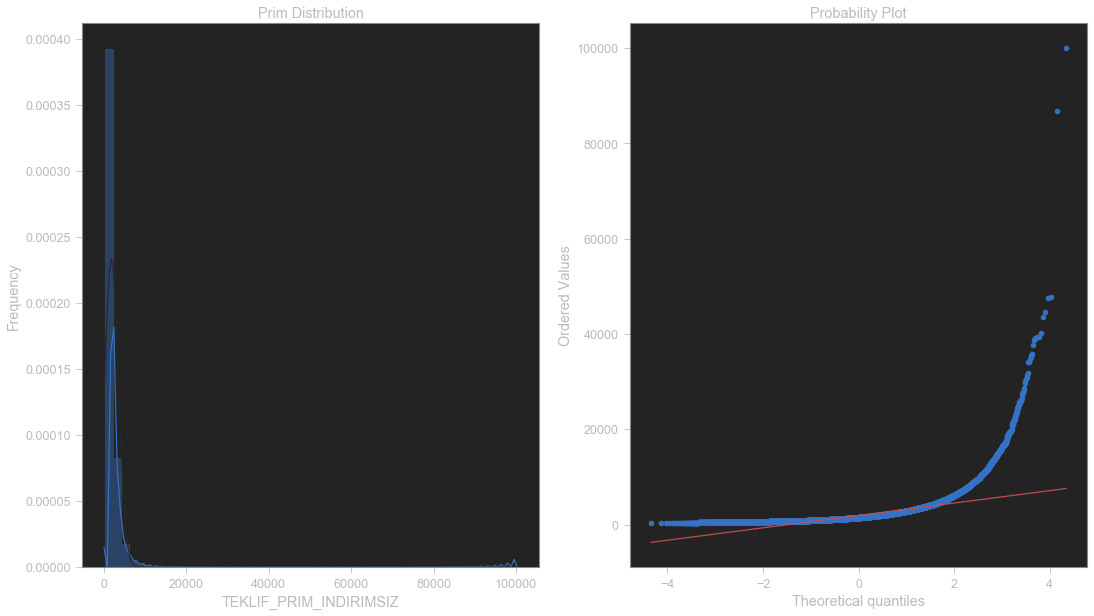

In [16]:
figure = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.distplot(data["TEKLIF_PRIM_INDIRIMSIZ"] , fit=norm);
(mu, sigma) = norm.fit(data["TEKLIF_PRIM_INDIRIMSIZ"])
plt.ylabel("Frequency")
plt.title("Prim Distribution")

plt.subplot(1,2,2)
stats.probplot(data["TEKLIF_PRIM_INDIRIMSIZ"], plot=plt)
plt.show()

In [17]:
#hedef normal dağılmadığı için logaritma uyguluyoruz.
data["TEKLIF_PRIM_INDIRIMSIZ"] = np.log1p(data["TEKLIF_PRIM_INDIRIMSIZ"])

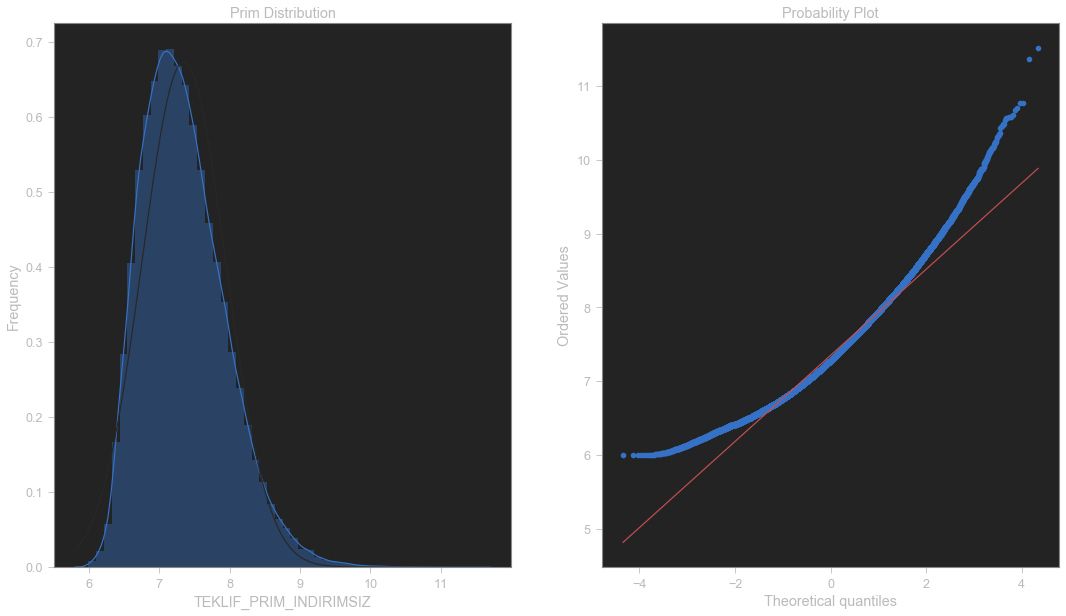

In [18]:
figure = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.distplot(data["TEKLIF_PRIM_INDIRIMSIZ"] , fit=norm);
(mu, sigma) = norm.fit(data["TEKLIF_PRIM_INDIRIMSIZ"])
plt.ylabel("Frequency")
plt.title("Prim Distribution")

plt.subplot(1,2,2)
stats.probplot(data["TEKLIF_PRIM_INDIRIMSIZ"], plot=plt)
plt.show()

Text(0.5, 1.0, 'Percentage Missing')

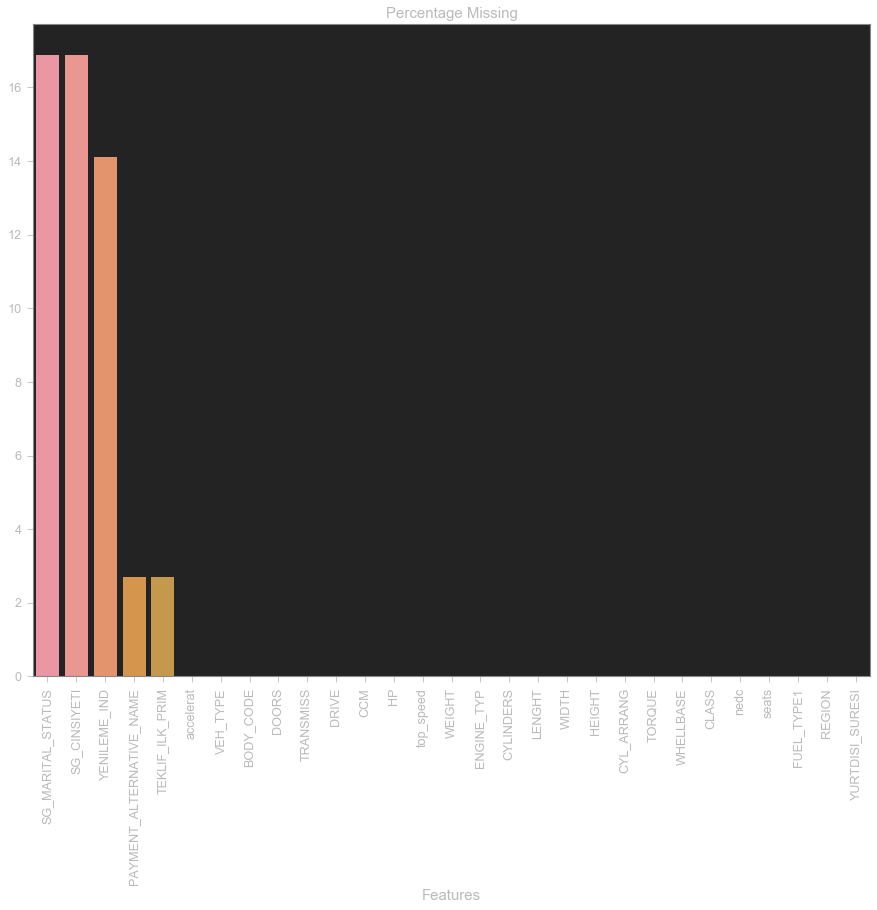

In [19]:
#missing values
na = (data.isnull().sum() / len(data)) * 100
na = na.drop(na[na == 0].index).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(15,12))
sns.barplot(x=na.index, y=na)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.title('Percentage Missing', fontsize=15)

In [20]:
data.isna().sum()

POL_Time                          0
PAYMENT_ALTERNATIVE_NAME       2682
TARIFF_CODE                       0
TARIFF_VERSION_NUM                0
VEHICLE_SUM_INSURED_AMOUNT        0
PLATE_CITY_CODE                   0
ARAC_YASI                         0
FREE_PROCESS_IND                  0
ES_REGION_NAME                    0
DISTRICT_CODE                     0
VEH-BRAND-MODEL                   0
PRIM                              0
SG_GB_MARS                        0
SG_SEGMENT_NAME                   0
SG_MUSTERI_TIPI                   0
SG_ISKOLU                         0
SG_CINSIYETI                  16770
SG_MARITAL_STATUS             16777
SG_OCCUPATION_NAME                0
SG_EDUCATIONAL_STATUS_NAME        0
HASARSIZLIK_KORUMA                0
DIGER_AKSESUAR_DEGERI             0
HASARSIZLIK_YILI                  0
KASA_TANK_LPG_BEDELI              0
ONCEKI_HASARSIZLIK_YILI           0
ONCEKI_SIGORTA_SIRKET             0
SES_GORUNTU_CIHAZLARI             0
YURTDISI_SURESI             

In [21]:
data.PAYMENT_ALTERNATIVE_NAME.value_counts()

9 TAKSIT                      43382
PESIN (%5 INDIRIMLI)          26810
MANUEL TAKSITLENDIRME         18115
8 TAKSIT                       3999
2 ESIT TAKSIT                  3113
%25 PESIN + 5 * %15 TAKSIT      984
5 TAKSIT                        305
PESIN                            21
2 TAKSIT                          1
Name: PAYMENT_ALTERNATIVE_NAME, dtype: int64

In [20]:
data.PAYMENT_ALTERNATIVE_NAME.fillna("9 TAKSIT", inplace = True)

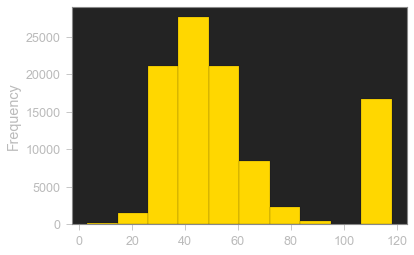

In [21]:
data.CUS_AGE.plot(kind='hist', color='gold', edgecolor='black', figsize=(6,4))

In [22]:
data["CUS_AGE"].describe()

count    99412.000000
mean        58.257645
std         29.229345
min          3.000000
25%         38.000000
50%         48.000000
75%         63.000000
max        118.000000
Name: CUS_AGE, dtype: float64

In [23]:
data.loc[data["CUS_AGE"]<18,"CUS_AGE"] = 58
data.loc[data["CUS_AGE"]>80,"CUS_AGE"] = 58

In [24]:
#Na kısımlarının şirket olabileceğini düşündüğüm için missing atadım
data.SG_CINSIYETI.value_counts()

E    57381
K    25261
Name: SG_CINSIYETI, dtype: int64

In [25]:
data.SG_CINSIYETI.fillna("missing",inplace = True)

In [26]:
#aynı sebepten ötürü missing atıyorum Na değerleri arasında 7 fark var zaten
data.SG_MARITAL_STATUS.value_counts()

E    62724
B    14675
O     3643
D     1593
Name: SG_MARITAL_STATUS, dtype: int64

In [27]:
data.SG_MARITAL_STATUS.fillna("missing",inplace = True)

In [28]:
#YURTDISI_SURESI 1 gözlem eksik olduğu için median atıyoruz.
data.YURTDISI_SURESI.median()
data.YURTDISI_SURESI.fillna(6,inplace = True)

In [29]:
data.TEKLIF_ILK_PRIM.describe()

count    96732.000000
mean      1919.852022
std       2045.871970
min        305.230000
25%        982.910000
50%       1434.450000
75%       2227.647500
max      99905.310000
Name: TEKLIF_ILK_PRIM, dtype: float64

In [30]:
data.TEKLIF_ILK_PRIM.fillna(1434.45,inplace = True)

veriyi incelediğimizde IPTAL_HARIC_NET_PRIM ve POLICE_PRIM'in 55724 tane aynı değere sahip olduğu görülüp kalan değerlerden 4589 tanesinin farklı olduğu gözlemlendi hem python hem excel üzerinden ayrıca, POLICE_ADET değişkeni IPTAL_HARIC_NET_PRIM değişkeninde değer varsa 1 gelmekte. Bu sebepten ötürü 3 değişken de yaklaşık olarak aynı datayı temsil ettiği için sadece POLICE PRIMLE çalısacagız ve missinglere 0 atayacağız.

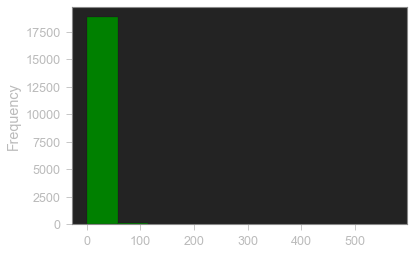

In [31]:
#bu veriyi datadan çıkarıyorum çünkü tek bir veride toplanmış ayrıca tam ne oldugunu da bilmiyoruz.
data.VEHICLE_SUM_INSURED_AMOUNT.value_counts().plot(kind='hist', color='green', edgecolor='black', figsize=(6,4))

In [32]:
data.drop("VEHICLE_SUM_INSURED_AMOUNT",axis = 1, inplace = True)

In [33]:
data[data["ARAC_YASI"] > 35]["ARAC_YASI"].count()

3

In [34]:
data.loc[data["ARAC_YASI"] > 35,"ARAC_YASI"] = 35

In [35]:
#Burada, eksik değer çok az oldugu için object olanlar için mode, numeric için median atandı.
col_names = data.columns
for col in col_names:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'O':
            data[col] = data[col].fillna(str(data[col].mode()))
        else:
            data[col].fillna(data[col].median(),inplace = True)

In [36]:
data.isnull().sum()

POL_Time                      0
PAYMENT_ALTERNATIVE_NAME      0
TARIFF_CODE                   0
TARIFF_VERSION_NUM            0
PLATE_CITY_CODE               0
ARAC_YASI                     0
FREE_PROCESS_IND              0
ES_REGION_NAME                0
DISTRICT_CODE                 0
VEH-BRAND-MODEL               0
PRIM                          0
SG_GB_MARS                    0
SG_SEGMENT_NAME               0
SG_MUSTERI_TIPI               0
SG_ISKOLU                     0
SG_CINSIYETI                  0
SG_MARITAL_STATUS             0
SG_OCCUPATION_NAME            0
SG_EDUCATIONAL_STATUS_NAME    0
HASARSIZLIK_KORUMA            0
DIGER_AKSESUAR_DEGERI         0
HASARSIZLIK_YILI              0
KASA_TANK_LPG_BEDELI          0
ONCEKI_HASARSIZLIK_YILI       0
ONCEKI_SIGORTA_SIRKET         0
SES_GORUNTU_CIHAZLARI         0
YURTDISI_SURESI               0
YENILEME_E_H                  0
ARAC_KULLANIM_SEKLI           0
VEH_AGE_RQ                    0
ONCEKI_YENILEME_NO            0
PROCESS_

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99412 entries, 0 to 99411
Data columns (total 81 columns):
POL_Time                      99412 non-null int64
PAYMENT_ALTERNATIVE_NAME      99412 non-null object
TARIFF_CODE                   99412 non-null object
TARIFF_VERSION_NUM            99412 non-null int64
PLATE_CITY_CODE               99412 non-null int64
ARAC_YASI                     99412 non-null int64
FREE_PROCESS_IND              99412 non-null object
ES_REGION_NAME                99412 non-null object
DISTRICT_CODE                 99412 non-null object
VEH-BRAND-MODEL               99412 non-null object
PRIM                          99412 non-null float64
SG_GB_MARS                    99412 non-null int64
SG_SEGMENT_NAME               99412 non-null object
SG_MUSTERI_TIPI               99412 non-null object
SG_ISKOLU                     99412 non-null object
SG_CINSIYETI                  99412 non-null object
SG_MARITAL_STATUS             99412 non-null object
SG_OCCUPATI

In [38]:
obje = []
cat2 = []
numb = []
for col in col_names:
    if data[col].dtype == 'O':
        obje.append(col)
    elif len(data[col].unique()) < 100:
        cat2.append(col)
    else:
        numb.append(col)

In [39]:
def one_hot_top_x(df,variable):
    top_10 = [x for x in df[variable].value_counts().sort_values(ascending = False).head(10).index]
    for label in top_10:
        df[variable+"_"+str(label)] = np.where(df[variable] == label,1,0)

In [40]:
for variable in obje:
    one_hot_top_x(data,variable)

In [41]:
data.shape

(99412, 302)

In [42]:
removen_obje = []
for variable in obje:
    if (len(data[variable].value_counts())) < 10:
        tail_1 = [x for x in df[variable].value_counts().sort_values(ascending = False).tail(1).index]
        for label in tail_1:
            removen_obje.append(variable+"_"+str(label))

In [43]:
for variable in cat2:
    one_hot_top_x(data,variable)

In [44]:
removen_cat2 = []
for variable in cat2:
    if (len(data[variable].value_counts())) < 10:
        tail_1 = [x for x in df[variable].value_counts().sort_values(ascending = False).tail(1).index]
        for label in tail_1:
            removen_cat2.append(variable+"_"+str(label))

In [45]:
data.shape

(99412, 478)

In [46]:
def remove_all(data,liste):
    for var in liste:
        data.drop(var,axis = 1,inplace = True)

In [47]:
#Bu kısımda oluşturduğumuz dummy ler arasında 10 leveldan az olan değişkenler için dummy trap olmaması
#için 1 er eksiltiyoruz. En son dummy atadıgımız değerlerin asıl hallerini datadan cıkarıyoruz.
remove_all(data,removen_cat2)
remove_all(data,removen_obje)
remove_all(data,obje)
remove_all(data,cat2)

In [48]:
data.shape

(99412, 382)

**Outlier**

In [49]:
numerical_features = data[numb]

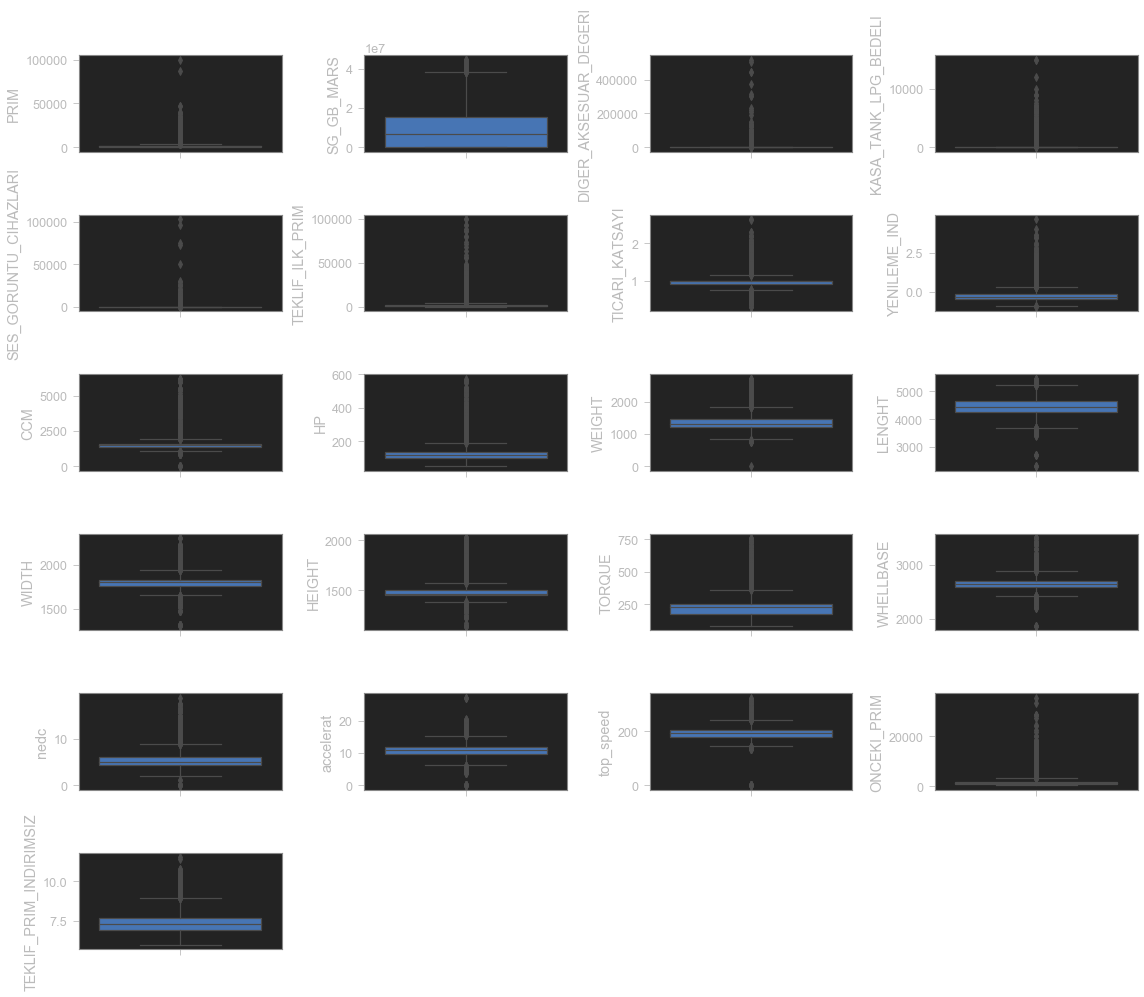

In [50]:
fig = plt.figure(figsize=(16,20))

for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

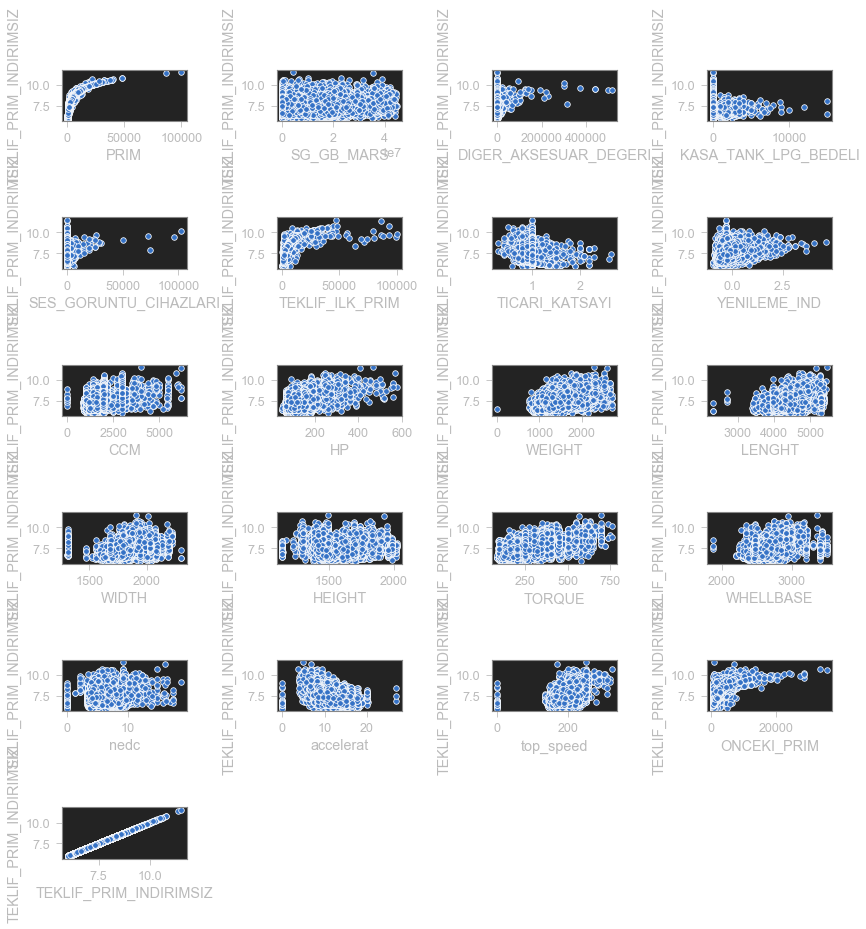

In [51]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(numerical_features.iloc[:, i],data["TEKLIF_PRIM_INDIRIMSIZ"])
plt.tight_layout()
plt.show()

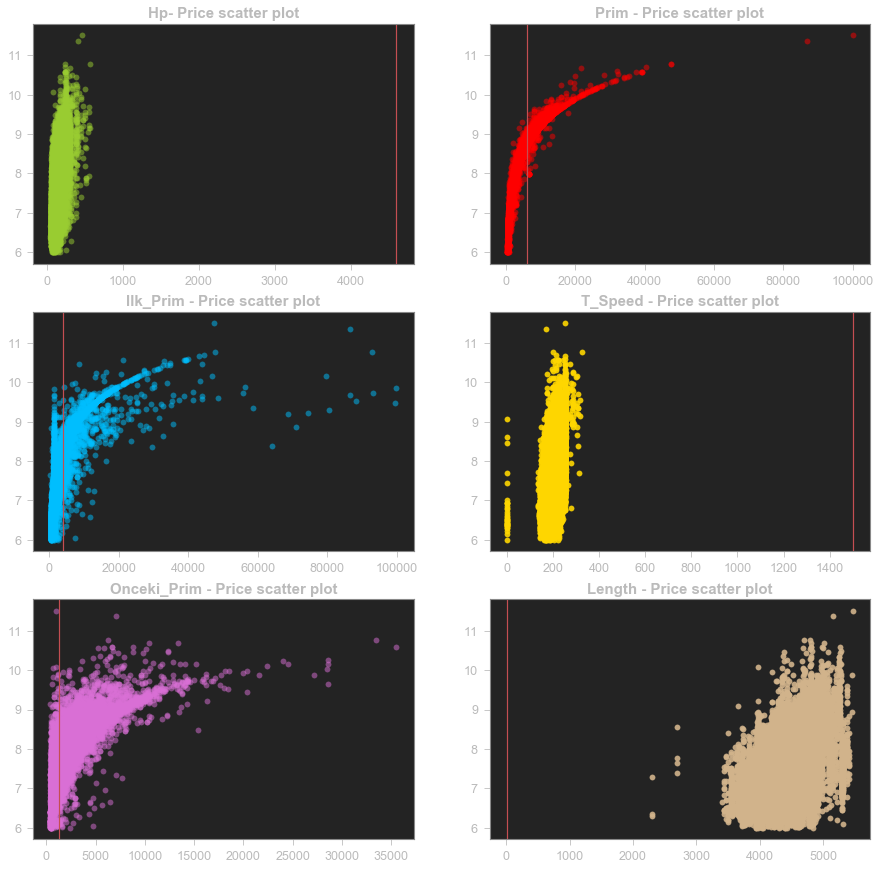

In [52]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=data["HP"], y=data["TEKLIF_PRIM_INDIRIMSIZ"], color=("yellowgreen"), alpha=0.5)
plt.axvline(x=4600, color="r", linestyle="-")
plt.title("Hp- Price scatter plot", fontsize=15, weight="bold" )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=data["PRIM"], y=data["TEKLIF_PRIM_INDIRIMSIZ"], color=("red"),alpha=0.5)
plt.axvline(x=5900, color="r", linestyle="-")
plt.title("Prim - Price scatter plot", fontsize=15, weight="bold" )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=data["TEKLIF_ILK_PRIM"], y=data["TEKLIF_PRIM_INDIRIMSIZ"], color=("deepskyblue"),alpha=0.5)
plt.axvline(x=4000, color="r", linestyle="-")
plt.title("Ilk_Prim - Price scatter plot", fontsize=15, weight="bold" )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=data["top_speed"], y=data["TEKLIF_PRIM_INDIRIMSIZ"], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color="r", linestyle="-")
plt.title("T_Speed - Price scatter plot", fontsize=15, weight="bold" )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=data["ONCEKI_PRIM"], y=data["TEKLIF_PRIM_INDIRIMSIZ"], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color="r", linestyle="-")
plt.title("Onceki_Prim - Price scatter plot", fontsize=15, weight="bold" )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=data["LENGHT"], y=data["TEKLIF_PRIM_INDIRIMSIZ"], color=("tan"),alpha=0.9)
plt.axvline(x=13, color="r", linestyle="-")
plt.title("Length - Price scatter plot", fontsize=15, weight="bold" )
plt.show()

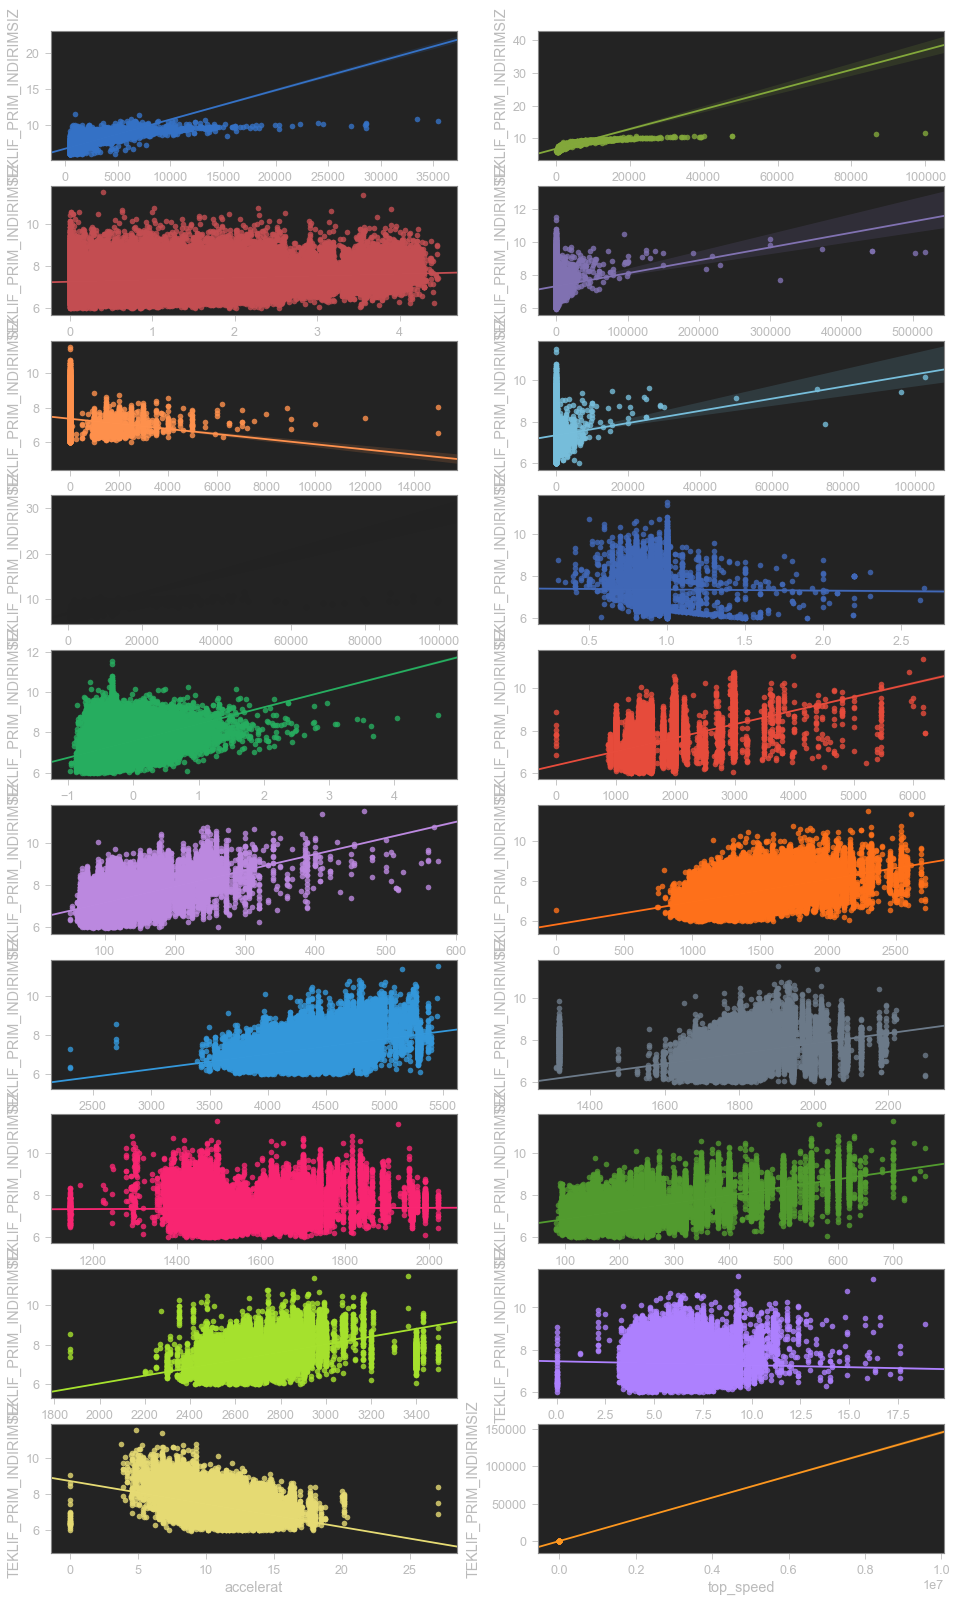

In [53]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12),(ax13, ax14),(ax15, ax16),
         (ax17, ax18),(ax19, ax20)) = plt.subplots(nrows=10, ncols=2)
figure.set_size_inches(16,28)

sns.regplot(data["ONCEKI_PRIM"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax1)
sns.regplot(data["PRIM"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax2)
sns.regplot(data["SG_GB_MARS"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax3)
sns.regplot(data["DIGER_AKSESUAR_DEGERI"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax4)
sns.regplot(data["KASA_TANK_LPG_BEDELI"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax5)
sns.regplot(data["SES_GORUNTU_CIHAZLARI"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax6)
sns.regplot(data["TEKLIF_ILK_PRIM"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax7)
sns.regplot(data["TICARI_KATSAYI"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax8)
sns.regplot(data["YENILEME_IND"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax9)
sns.regplot(data["CCM"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax10)
sns.regplot(data["HP"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax11)
sns.regplot(data["WEIGHT"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax12)
sns.regplot(data["LENGHT"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax13)
sns.regplot(data["WIDTH"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax14)
sns.regplot(data["HEIGHT"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax15)
sns.regplot(data["TORQUE"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax16)
sns.regplot(data["WHELLBASE"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax17)
sns.regplot(data["nedc"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax18)
sns.regplot(data["accelerat"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax19)
sns.regplot(data["top_speed"], data["TEKLIF_PRIM_INDIRIMSIZ"], ax=ax20)

In [55]:
data = data.drop(data[data["ONCEKI_PRIM"]>20000].index)
data = data.drop(data[data["PRIM"]>40000].index)
data = data.drop(data[data["DIGER_AKSESUAR_DEGERI"]>180000].index)
data = data.drop(data[data["KASA_TANK_LPG_BEDELI"]>6000].index)
data = data.drop(data[data["SES_GORUNTU_CIHAZLARI"]>40000].index)
data = data.drop(data[data["TEKLIF_ILK_PRIM"]>55000].index)
data = data.drop(data[data["TICARI_KATSAYI"]>2.5].index)
data = data.drop(data[data["YENILEME_IND"]>3].index)
data = data.drop(data[data["CCM"]>6000].index)
data = data.drop(data[data["CCM"]<200].index)
data = data.drop(data[data["HP"]>550].index)
data = data.drop(data[data["WEIGHT"]<500].index)
data = data.drop(data[data["LENGHT"]<3000].index)
data = data.drop(data[data["WIDTH"]<1400].index)
data = data.drop(data[data["WIDTH"]>2300].index)
data = data.drop(data[data["HEIGHT"]<1200].index)
data = data.drop(data[data["WHELLBASE"]<2000].index)
data = data.drop(data[data["WHELLBASE"]>3300].index)
data = data.drop(data[data["nedc"]<2.5].index)
data = data.drop(data[data["nedc"]>15.1].index)
data = data.drop(data[data["accelerat"]>25].index)
data = data.drop(data[data["accelerat"]<3].index)
data = data.drop(data[data["top_speed"]>300].index)
data = data.drop(data[data["top_speed"]<50].index)

In [56]:
X = data.drop("TEKLIF_PRIM_INDIRIMSIZ",axis = 1)
y = data["TEKLIF_PRIM_INDIRIMSIZ"]

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.25,random_state = 42)

In [58]:
X_train.shape,y_train.shape

((58998, 381), (58998,))

In [59]:
#dubli olanları datadan cıkaracagız. 
duplicated_feat = []
for i in range(0,len(X_train.columns)):
    if i % 10 == 0:
        print(i)
    col_1 = X_train.columns[i]
    for col_2 in X_train.columns[i+1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380


In [60]:
print(len(set(duplicated_feat)))
set(duplicated_feat)

18


{'CYLINDERS_0.0',
 'CYLINDERS_12.0',
 'CYL_ARRANG_-',
 'CYL_ARRANG_0    S\ndtype: object',
 'DK_DETAY_DIREKT ISLER',
 'DK_DETAY_TGB',
 'DK_DETAY_VDF SIGORTA',
 'DK_VDF SIGORTA',
 'DRIVE_0    F\ndtype: object',
 'ENGINE_TYP_0    OTTO\ndtype: object',
 'FUEL_TYPE1_0    O\ndtype: object',
 'KASKO_TECDIT_PROFIL_KODU_1',
 'KASKO_TECDIT_PROFIL_KODU_2',
 'KASKO_TECDIT_PROFIL_KODU_3',
 'KASKO_TECDIT_PROFIL_KODU_4',
 'KASKO_TECDIT_PROFIL_KODU_5',
 'KASKO_TECDIT_PROFIL_KODU_6',
 'POL_Time_145'}

In [61]:
X.drop(labels=duplicated_feat, axis=1, inplace=True)
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_val.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

In [62]:
X_train.shape, X_test.shape,X_val.shape

((58998, 363), (19666, 363), (19666, 363))

In [63]:
#constanta baktıgımızda 0 oldugunu gördüğümüz için quasi constantları cıkaracagız.
#QUASI CONSTANT
#quasi-constant
#düşük tahmin gücü, hedef için etkisi yok sayılabilir. sabit
#threshold koyuyoruz
quasi_constant_feat = []
for feature in X_train.columns:
    predominant = (X_train[feature].value_counts()/np.float(len(X_train))).sort_values(ascending=False).values[0]
    if predominant > 0.998:
        quasi_constant_feat.append(feature)

In [64]:
len(quasi_constant_feat)

44

In [65]:
X_train.drop(labels = quasi_constant_feat,axis = 1,inplace = True)
X_val.drop(labels = quasi_constant_feat,axis = 1,inplace = True)
X_test.drop(labels = quasi_constant_feat,axis = 1,inplace = True)
X.drop(labels = quasi_constant_feat,axis = 1,inplace = True)

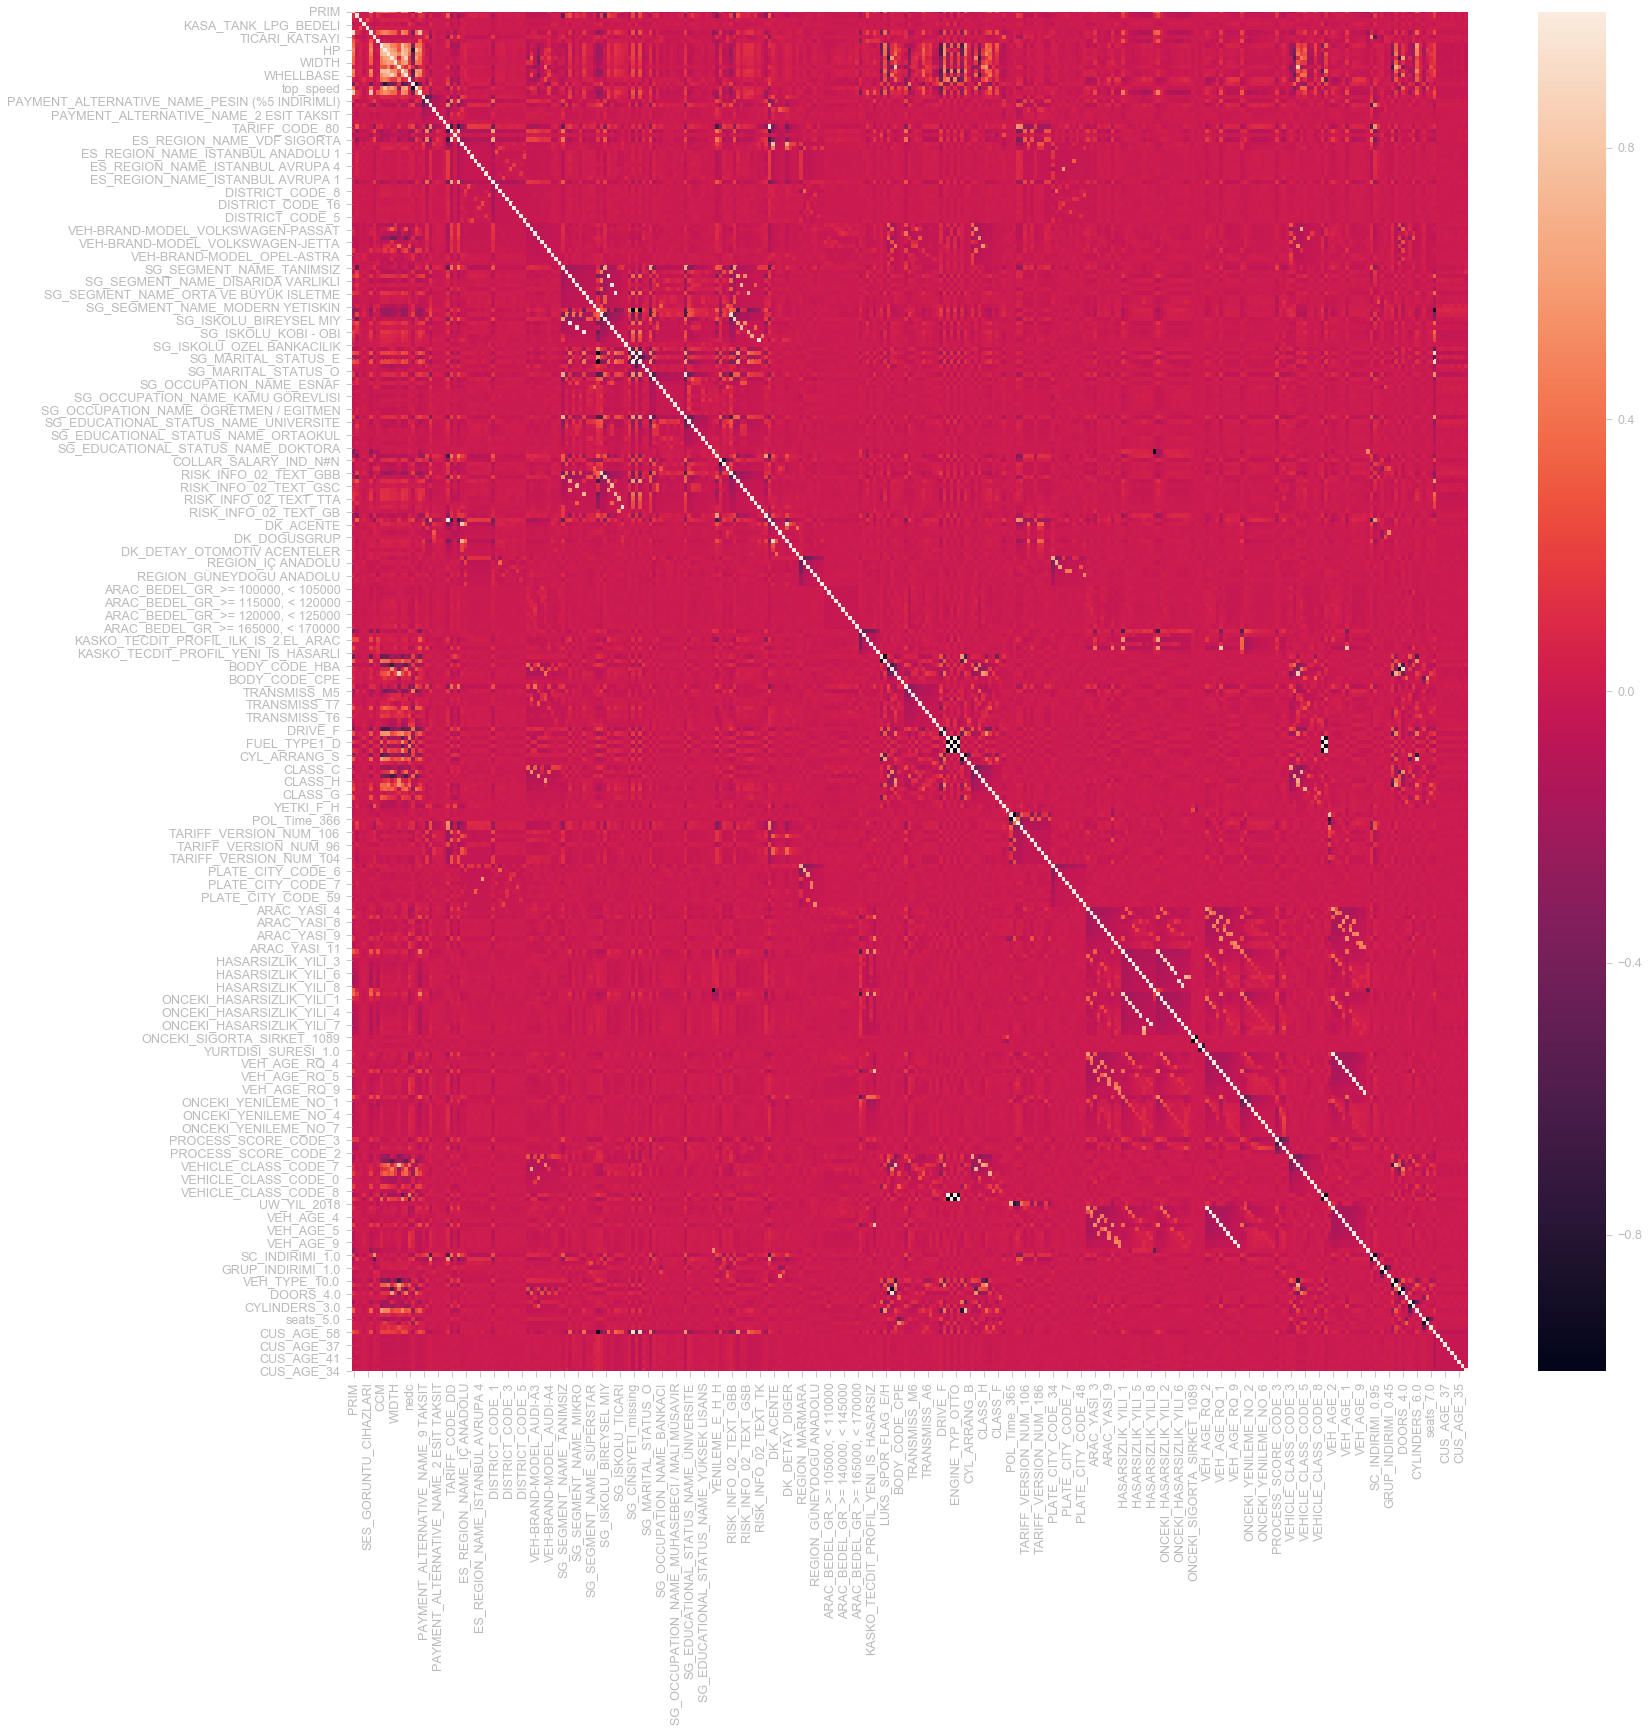

In [67]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(25,25)
sns.heatmap(corrmat)

In [68]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [69]:
corr_features = correlation(X_train,0.8)

In [70]:
len(set(corr_features))

59

In [71]:
X_train.drop(corr_features, axis = 1,inplace = True)
X_test.drop(corr_features, axis = 1,inplace = True)
X_val.drop(corr_features, axis = 1,inplace = True)
X.drop(corr_features, axis = 1,inplace = True)

In [72]:
#Çok fazla değişken olduğu için farklı bir yaklaşım denemek istedim ve burada değişkenlerin y ye göre
#korelasyon değerlerinden 0.05 in üzerinde olanları stepwise işlemine dahil ettim. Bunun benim adıma
#en önemli sebeplerinden biri de yapılacak işlemlerin çok fazla zaman alması oldu.Genelde 0.2 den küçük olanlar dahil edilmez
col_names = X_train.columns
Corwithy = []
for var in col_names:
    Corwithy.append(abs(y_train.corr(X_train[var])))

In [73]:
Corwithy

[0.8559236204012564,
 0.15121954855613198,
 0.05141652246851227,
 0.08107334641916632,
 0.021734708336646705,
 0.007044685614733906,
 0.42246390357845276,
 0.3565985858351646,
 0.4758518234568053,
 0.4308847604323296,
 0.3818097110193933,
 0.3501287523903821,
 0.005055143777394655,
 0.055528073355712956,
 0.4111655886157321,
 0.09385341647502572,
 0.09842207638715804,
 0.22227277526545072,
 0.019575698188879397,
 0.03494976597392094,
 0.014541786438765369,
 0.01320973617393512,
 0.10818990987960977,
 0.0878647875975399,
 0.044019737723545484,
 0.012760692256224346,
 0.029297639305252973,
 0.011130782421811604,
 0.0017881636901697655,
 0.0010143612761158373,
 0.00805328582301586,
 0.010467857754122343,
 0.000695588964821793,
 0.018538521972516535,
 0.014426952180592137,
 0.01366954957377918,
 0.01040188309626943,
 0.005003030042914513,
 0.00364663760362479,
 0.0006809080461081733,
 0.011159807475539343,
 0.013847520908982173,
 0.00639694625318073,
 0.00098026365186899,
 0.06315405061951

In [74]:
X_corr_rated = pd.DataFrame({"col_names":col_names,
                             "rank":Corwithy})
X_corr_rated_dropping = X_corr_rated[X_corr_rated["rank"] < 0.2]
X_corr_rated_dropping.shape

(224, 2)

In [75]:
for col in X_corr_rated_dropping["col_names"]:
    X_train.drop(col,axis = 1,inplace = True) 
    X_test.drop(col,axis = 1,inplace = True) 
    X_val.drop(col,axis = 1,inplace = True)
    X.drop(col,axis = 1,inplace = True)

In [76]:
column_names = X_train.columns

MODELING

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm

In [78]:
ols = sm.OLS(y_train, X_train).fit() 

In [79]:

ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     TEKLIF_PRIM_INDIRIMSIZ   R-squared (uncentered):                   0.999
Model:                                OLS   Adj. R-squared (uncentered):              0.999
Method:                     Least Squares   F-statistic:                          1.276e+06
Date:                    Wed, 08 Jul 2020   Prob (F-statistic):                        0.00
Time:                            16:44:03   Log-Likelihood:                         -5089.8
No. Observations:                   58998   AIC:                                  1.025e+04
Df Residuals:                       58962   BIC:                                  1.058e+04
Df Model:                              36                                                  
Covariance Type:                nonrobust                                                  
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
PRIM                                               0.0002   1.11e-06    199.739      0.000       0.000       0.000
YENILEME_IND                                       0.3503      0.004     82.374      0.000       0.342       0.359
CCM                                                0.0002   6.26e-06     36.814      0.000       0.000       0.000
HP                                                 0.0006   8.87e-05      6.610      0.000       0.000       0.001
WEIGHT                                            -0.0002   1.03e-05    -21.736      0.000      -0.000      -0.000
LENGHT                                             0.0005    6.3e-06     81.652      0.000       0.001       0.001
WIDTH                                              0.0022   1.66e-05    131.338      0.000       0.002       0.002
accelerat                                          0.0025      0.001      2.381      0.017       0.000       0.005
PAYMENT_ALTERNATIVE_NAME_MANUEL TAKSITLENDIRME    -0.0236      0.003     -7.634      0.000      -0.030      -0.018
SG_MUSTERI_TIPI_G                                  0.0489      0.004     11.478      0.000       0.041       0.057
SG_ISKOLU_BIREYSEL KITLE                          -0.0035      0.003     -1.262      0.207      -0.009       0.002
SG_MARITAL_STATUS_E                               -0.0861      0.003    -30.335      0.000      -0.092      -0.081
SG_OCCUPATION_NAME_TANIMSIZ                        0.0220      0.003      6.881      0.000       0.016       0.028
HASARSIZLIK_KORUMA_E                              -0.1135      0.007    -16.823      0.000      -0.127      -0.100
COLLAR_SALARY_IND_N#N                              0.1031      0.003     35.081      0.000       0.097       0.109
REHINLI_ALACAKLI_MI_H                             -0.0152      0.003     -5.282      0.000      -0.021      -0.010
KASKO_TECDIT_PROFIL_YENILEME_HASARSIZ             -0.0313      0.003     -9.925      0.000      -0.038      -0.025
KASKO_TECDIT_PROFIL_ILK_IS_2.EL_ARAC               0.0012      0.006      0.206      0.836      -0.011       0.013
KASKO_TECDIT_PROFIL_ILK_IS_SIFIR_ARAC             -0.0292      0.006     -4.491      0.000      -0.042      -0.016
LUKS_SPOR_FLAG_H/H                                 0.5136      0.012     42.575      0.000       0.490       0.537
TRANSMISS_M5                                      -0.0628      0.003    -19.691      0.000      -0.069      -0.057
TRANSMISS_T8                                       0.0228      0.006      3.631      0.000       0.010       0.035
DRIVE_F                                           -0.0275      0.

In [80]:
X_train.drop("KASKO_TECDIT_PROFIL_ILK_IS_2.EL_ARAC",axis = 1, inplace = True)
X_train.drop("ONCEKI_HASARSIZLIK_YILI_9",axis = 1, inplace = True)
X_train.drop("SG_ISKOLU_BIREYSEL KITLE",axis = 1, inplace = True)
X_train.drop("ARAC_YASI_3",axis = 1, inplace = True)

In [81]:
vallist = ["ONCEKI_HASARSIZLIK_YILI_9","ARAC_YASI_3","KASKO_TECDIT_PROFIL_ILK_IS_2.EL_ARAC","SG_ISKOLU_BIREYSEL KITLE"]

In [82]:
def coldrop(data,vallist):
    for val in vallist:
        data.drop(val,axis = 1, inplace = True)

In [83]:
coldrop(X,vallist)
coldrop(X_val,vallist)
coldrop(X_test,vallist)

In [84]:
#Regression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
y_pred = reg.predict(X_val)

In [86]:
r2_score(y_val,y_pred)

0.866086280319782

In [87]:
mean_absolute_error(y_val,y_pred)

0.16202648969207273

In [88]:
mean_squared_error(y_val,y_pred)

0.04649236770729979

In [89]:
##Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()

In [90]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
y_pred = ridge.predict(X_val)

In [92]:
r2_score(y_val,y_pred)

0.8660885288198532

In [93]:
mean_squared_error(y_val, y_pred)

0.04649158706964476

In [94]:
mean_absolute_error(y_val,y_pred)

0.16202336777017737

In [95]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [96]:
y_pred = regressor.predict(X_val)

In [97]:
r2_score(y_val,y_pred)

0.9585253070685146

In [98]:
mean_absolute_error(y_val,y_pred)

0.07471994545743034

In [99]:
mean_squared_error(y_val,y_pred)

0.014399246611344866

In [100]:
#XGBoost
from xgboost import XGBRegressor

In [101]:
model = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                     max_depth=3, min_child_weight=0,
                     gamma=0, subsample=0.7,
                     colsample_bytree=0.7,
                     objective='reg:squarederror', nthread=-1,
                     scale_pos_weight=1, seed=27,
                     reg_alpha=0.00006)

In [102]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             n_estimators=3460, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=27, reg_alpha=6e-05,
             reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [103]:
y_pred = model.predict(X_val)

In [104]:
r2_score(y_val,y_pred)

0.9793211152791641

In [100]:
mean_absolute_error(y_val,y_pred)

0.06250326092069323

In [101]:
mean_squared_error(y_val,y_pred)

0.0071793264686679376

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
scores = cross_val_score(model, X, y, cv=5)

In [131]:
scores

array([0.96108963, 0.96978375, 0.973136  , 0.98441298, 0.98303194])

In [132]:
scores.mean()

0.974290860015189

In [105]:
y_predictions = model.predict(X_test)

In [106]:
r2_score(y_test,y_predictions)

0.9787050283504407

In [107]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

In [108]:
k = X_test.shape[1]
n = len(X_test)
k
n
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predictions)),".3f"))
RMSE
MSE = mean_squared_error(y_test,y_predictions)
MAE = mean_absolute_error(y_test,y_predictions)
r2 = r2_score(y_test,y_predictions)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test-y_predictions)/y_test))*100
print("RMSE= ", RMSE, "\nMSE= ", MSE,"\nMAE= ",MAE,"\nr2= ",r2,"\nadj_r2= ",adj_r2,"\nMAPE= ",MAPE)

RMSE=  0.086 
MSE=  0.00740111662755853 
MAE=  0.06278990319052241 
r2=  0.9787050283504407 
adj_r2=  0.978670319488179 
MAPE=  0.8610571464484891


In [104]:
mean_absolute_error(y_test,y_predictions)

0.06278990319052241

In [105]:
mean_squared_error(y_test,y_predictions)

0.00740111662755853

In [109]:
y_pred_org_2 = np.expm1(y_predictions)
y_test_org_2 = np.expm1(y_test)

In [110]:
y_pred_org_2[0:10]

array([3361.816 , 1165.6704, 1923.7283, 2117.2634, 2628.1687, 2071.9902,
        680.7337,  737.4305, 1377.306 , 1190.1813], dtype=float32)

In [111]:
y_test_org_2[0:10]

66392    2913.930000
4951     1264.795322
26134    1876.910000
55066    2049.020000
65448    2536.650000
33895    1935.130000
24311     610.140000
15444     801.944272
88839    1570.250000
20982    1171.850000
Name: TEKLIF_PRIM_INDIRIMSIZ, dtype: float64

In [ ]:
y_t = y_test_org_2.reset

In [114]:
y_pred_final = pd.DataFrame(y_pred_org_2)

In [115]:
y_pred_final.to_csv("y_pred_2.csv",index = False)

In [116]:
y_test_org_2.to_csv("y_test_2.csv",index = False)

In [151]:
y_pred_final.head(10)

,0
0,3361.815918
1,1165.670410
2,1923.728271
3,2117.263428
4,2628.168701
5,2071.990234
6,680.733704
7,737.430481
8,1377.306030
9,1190.181274


In [152]:
y_test_final = pd.DataFrame(y_test)

In [153]:
y_test_final.to_csv("y_test_orgin.csv")

In [154]:
X_test.to_csv("X_test_orgin.csv")

In [117]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

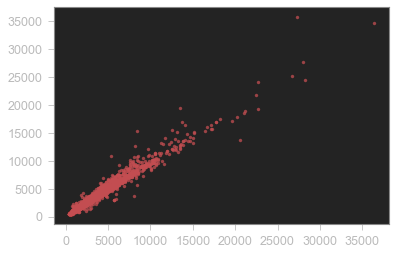

In [119]:
scatterplot(y_pred_final,y_test_org_2)